# Пример применения регрессии
В данном анализе у нас будет выборка данных, состоящая из ноутбуков их характеристик и розничной цены.

Описание переменныж: 

* 'Company' - Строчное  - Производитель товара
* 'Product’ -String - Бренд или модель 
* 'TypeName' -String -Тип (Ноутбук, Ультрабук, Игровой, и т.д)
* 'Inches' -Numeric- Размер экрана в дюймах
* 'ScreenResolution' -String- Разрешение экрана 
* 'Cpu' - String - Центральный процессов (CPU)
* 'Ram' -String- Количество оперативной памяти
* 'Memory' -String- Hard Disk / SSD Memory 
* 'GPU' -String- -графический процессов (GPU)
* 'OpSys' -String- Операционная система
* 'Weight' -String- Вес 
* 'Price_euros' - Ценна в Евро


In [151]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

## Первичный анализ

In [152]:
df = pd.read_csv("Price_euros_train.csv")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [ ]:
df.shape

In [154]:
df.isna().sum(axis=1).sum()

86

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1097 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1055 non-null   object 
 11  Weight            1086 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


## Работа с пропусками


In [156]:
for i in df.columns:
    if(df[i].isna().sum() != 0):
        print(f'{i} count empty cells: {df[i].isna().sum()}')
df.shape

ScreenResolution count empty cells: 11
OpSys count empty cells: 53
Weight count empty cells: 22


(1108, 13)

### Пропуски в ScreenResolution
В данной выборке в большей части встречается расширение 1920x1980. Поэтому было принятно, что пропуски заполнить самым часто встречающимся

In [157]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                429
1366x768                                         241
IPS Panel Full HD 1920x1080                      191
IPS Panel Full HD / Touchscreen 1920x1080         46
Full HD / Touchscreen 1920x1080                   36
1600x900                                          19
Quad HD+ / Touchscreen 3200x1800                  15
Touchscreen 1366x768                              12
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              6
IPS Panel 1366x768                                 6
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Retina Display 2560x1600                 5
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200               

In [158]:
df['ScreenResolution'] = ['1920x1080' if type(i) == float else i for i in df['ScreenResolution'] ]
df['ScreenResolution'].isnull().sum()

0

### Работа с пропусками OpSys
Тут было принято аналагичное решение, заполнить самым часто встречающимся 

In [159]:
df['OpSys'].value_counts()

Windows 10      864
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

In [160]:
df['OpSys'] = ['Windows 10' if type(i) == float else i for i in df['OpSys']]
df['OpSys'].value_counts()

Windows 10      917
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

### Работа с пропусками в Weight
Проанализировав распределение данных, было принято решение заполнить пропуски средним значением по выборке

<Axes: >

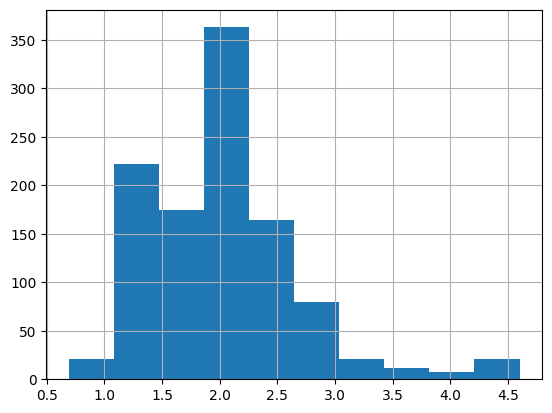

In [161]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Weight'].hist()

In [162]:
df['Weight'] = [df['Weight'].mean() if np.isnan(i) else i for i in df['Weight']]

In [163]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

От пропусков мы успешно избавились

## Подготовка выборки для дальнешийх исследований
*Убираем GB из переменной Ram

In [164]:
df['Ram'].value_counts() ## Все в гб

8GB     525
4GB     323
16GB    172
6GB      34
12GB     19
2GB      18
32GB     13
24GB      3
64GB      1
Name: Ram, dtype: int64

In [165]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(float)
df['Ram'].describe()

count    1108.000000
mean        8.361011
std         5.075011
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [166]:
df['WidthAndHeight'] = [i.split()[-1] if type(i) != float else np.nan for i in df['ScreenResolution']]

df['Width'] = [i.split('x')[0] if type(i) != float else np.nan for i in df['WidthAndHeight']]
df['Height'] = [i.split('x')[-1] if type(i) != float else np.nan for i in df['WidthAndHeight']]

df['Touchscreen'] = [1 if (type(i) != float) and ('Touchscreen' in i) else 0 for i in df['ScreenResolution']]

df['Width'] = df['Width'].astype(float)
df['Height'] = df['Height'].astype(float)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,WidthAndHeight,Width,Height,Touchscreen
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,1440.0,900.0,0
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,2880.0,1800.0,0
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,2560.0,1600.0,0
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,1366x768,1366.0,768.0,0
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2880x1800,2880.0,1800.0,0


### Удаление ненужных столбцов

In [167]:
df.drop(['ScreenResolution'], axis=1, inplace=True)
df.drop(['WidthAndHeight'], axis=1, inplace=True)
df.drop(['laptop_ID'], axis=1, inplace=True)
df.drop(['Gpu'], axis=1, inplace=True)
df.drop(['Product'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros,Width,Height,Touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,macOS,1.34,898.94,1440.0,900.0,0
1,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,macOS,1.83,2537.45,2880.0,1800.0,0
2,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,macOS,1.37,1803.60,2560.0,1600.0,0
3,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4.0,500GB HDD,Windows 10,2.10,400.00,1366.0,768.0,0
4,Apple,Ultrabook,15.4,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Mac OS X,2.04,2139.97,2880.0,1800.0,0


### Cpu 
Разобьем на бренд и частоту

In [168]:
df['frequency'] =  [x.split(' ')[-1].replace('GHz', '') for x in df['Cpu']]
df['frequency'] = df['frequency'].astype(float)

df['brand_cpu'] =  [x.split(' ')[0] for x in df['Cpu']]

df.drop(['Cpu'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu
0,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,macOS,1.34,898.94,1440.0,900.0,0,1.8,Intel
1,Apple,Ultrabook,15.4,16.0,512GB SSD,macOS,1.83,2537.45,2880.0,1800.0,0,2.7,Intel
2,Apple,Ultrabook,13.3,8.0,256GB SSD,macOS,1.37,1803.60,2560.0,1600.0,0,3.1,Intel
3,Acer,Notebook,15.6,4.0,500GB HDD,Windows 10,2.10,400.00,1366.0,768.0,0,3.0,AMD
4,Apple,Ultrabook,15.4,16.0,256GB Flash Storage,Mac OS X,2.04,2139.97,2880.0,1800.0,0,2.2,Intel


### Сопоставим ОС с числом
* Windows - 0
* MacOs - 1
* Linux - 2
* Остальные - 3

In [169]:
df['OpSys'].value_counts()

Windows 10      917
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

In [170]:
df['OS'] = df['OpSys']

df.loc[df['OS'].str.contains('Windows'), 'OS'] = '0'
df.loc[df['OS'].str.contains('macOS|Mac OS X'), 'OS'] = '1'
df.loc[df['OS'].str.contains('Linux'), 'OS'] = '2'
df.loc[~df['OS'].isin(['0', '1', '2']), 'OS'] = 3

df.drop(['OpSys'], axis=1, inplace=True)

df['OS'].value_counts()

0    958
3     82
2     53
1     15
Name: OS, dtype: int64

In [171]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS
0,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,1.34,898.94,1440.0,900.0,0,1.8,Intel,1
1,Apple,Ultrabook,15.4,16.0,512GB SSD,1.83,2537.45,2880.0,1800.0,0,2.7,Intel,1
2,Apple,Ultrabook,13.3,8.0,256GB SSD,1.37,1803.60,2560.0,1600.0,0,3.1,Intel,1
3,Acer,Notebook,15.6,4.0,500GB HDD,2.10,400.00,1366.0,768.0,0,3.0,AMD,0
4,Apple,Ultrabook,15.4,16.0,256GB Flash Storage,2.04,2139.97,2880.0,1800.0,0,2.2,Intel,1


### Преобразование Memory
Так как у нас в данной переменной лежат данные и в Гб И Тб, нужно это учесть. 
Добавим новые столбцы HDD, SSD, Flash Storage, Hybrid. Инициализируем их числовыми значениями, если они есть. В противном случае нулем. 

In [172]:
df['Memory'].value_counts()

256GB SSD                        344
1TB HDD                          187
500GB HDD                        118
512GB SSD                        100
128GB SSD +  1TB HDD              81
256GB SSD +  1TB HDD              66
128GB SSD                         64
32GB Flash Storage                34
2TB HDD                           14
64GB Flash Storage                12
1TB SSD                           11
512GB SSD +  1TB HDD              11
256GB SSD +  2TB HDD               9
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           5
256GB Flash Storage                5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
180GB SSD                          3
128GB SSD +  2TB HDD               2
16GB SSD                           2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                           1
2

In [173]:
def separation_components(str):
    my_list = str.split(' ')
    my_list = list(filter(None, my_list))

    str = ' '.join(my_list)

    ans = {'HDD': 0, 'SSD': 0, 'Flash Storage': 0, 'Hybrid': 0}
    components = str.split(' + ')

    for i in components:
        disk_type = i.split(' ')[1:]
        disk_type = ' '.join(disk_type)
        
        memory_size = i.split(' ')[0].replace('GB', '')

        if('TB' in memory_size):
            memory_size = memory_size.replace('TB', '')
            memory_size = float(memory_size) * 1000
            
        ans[disk_type] = memory_size

    return ans

In [174]:
HDD = []
SSD = []
Flash_Storage = []
Hybrid = []

for i in df['Memory']:
    memory_types_size = separation_components(i)
    HDD.append(memory_types_size['HDD'])
    SSD.append(memory_types_size['SSD'])
    Flash_Storage.append(memory_types_size['Flash Storage'])
    Hybrid.append(memory_types_size['Hybrid'])

df['HDD'] = HDD
df['SSD'] = SSD
df['Flash Storage'] = Flash_Storage
df['Hybrid'] = Hybrid

In [175]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,1.34,898.94,1440.0,900.0,0,1.8,Intel,1,0,0,128,0
1,Apple,Ultrabook,15.4,16.0,512GB SSD,1.83,2537.45,2880.0,1800.0,0,2.7,Intel,1,0,512,0,0
2,Apple,Ultrabook,13.3,8.0,256GB SSD,1.37,1803.60,2560.0,1600.0,0,3.1,Intel,1,0,256,0,0
3,Acer,Notebook,15.6,4.0,500GB HDD,2.10,400.00,1366.0,768.0,0,3.0,AMD,0,500,0,0,0
4,Apple,Ultrabook,15.4,16.0,256GB Flash Storage,2.04,2139.97,2880.0,1800.0,0,2.2,Intel,1,0,0,256,0


In [176]:
df.drop(['Memory'], axis=1, inplace=True)

In [177]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,8.0,1.34,898.94,1440.0,900.0,0,1.8,Intel,1,0,0,128,0
1,Apple,Ultrabook,15.4,16.0,1.83,2537.45,2880.0,1800.0,0,2.7,Intel,1,0,512,0,0
2,Apple,Ultrabook,13.3,8.0,1.37,1803.60,2560.0,1600.0,0,3.1,Intel,1,0,256,0,0
3,Acer,Notebook,15.6,4.0,2.10,400.00,1366.0,768.0,0,3.0,AMD,0,500,0,0,0
4,Apple,Ultrabook,15.4,16.0,2.04,2139.97,2880.0,1800.0,0,2.2,Intel,1,0,0,256,0


### 

In [178]:
df['OS'] = df['OS'].astype(float)
df['Flash Storage'] = df['Flash Storage'].astype(float)
df['Hybrid'] = df['Hybrid'].astype(float)
df['SSD'] = df['SSD'].astype(float)
df['HDD'] = df['HDD'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1108 non-null   object 
 1   TypeName       1108 non-null   object 
 2   Inches         1108 non-null   float64
 3   Ram            1108 non-null   float64
 4   Weight         1108 non-null   float64
 5   Price_euros    1108 non-null   float64
 6   Width          1108 non-null   float64
 7   Height         1108 non-null   float64
 8   Touchscreen    1108 non-null   int64  
 9   frequency      1108 non-null   float64
 10  brand_cpu      1108 non-null   object 
 11  OS             1108 non-null   float64
 12  HDD            1108 non-null   float64
 13  SSD            1108 non-null   float64
 14  Flash Storage  1108 non-null   float64
 15  Hybrid         1108 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 138.6+ KB


### Brand_cpu
Преобрзуем в числовые значения 
* Intel - 0
* Amd - 1
* Samsung - 2
* В других случаях - 3

In [179]:
df['brand_cpu'].value_counts()

Intel      1054
AMD          53
Samsung       1
Name: brand_cpu, dtype: int64

In [180]:
replace_dict = {'Intel': 0, 'Amd': 1, 'Samsung': 2}
df['brand_cpu'] = df['brand_cpu'].map(replace_dict).fillna(3)

In [181]:
df['brand_cpu'].value_counts()

0.0    1054
3.0      53
2.0       1
Name: brand_cpu, dtype: int64

In [182]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,8.0,1.34,898.94,1440.0,900.0,0,1.8,0.0,1.0,0.0,0.0,128.0,0.0
1,Apple,Ultrabook,15.4,16.0,1.83,2537.45,2880.0,1800.0,0,2.7,0.0,1.0,0.0,512.0,0.0,0.0
2,Apple,Ultrabook,13.3,8.0,1.37,1803.60,2560.0,1600.0,0,3.1,0.0,1.0,0.0,256.0,0.0,0.0
3,Acer,Notebook,15.6,4.0,2.10,400.00,1366.0,768.0,0,3.0,3.0,0.0,500.0,0.0,0.0,0.0
4,Apple,Ultrabook,15.4,16.0,2.04,2139.97,2880.0,1800.0,0,2.2,0.0,1.0,0.0,0.0,256.0,0.0


### TypeName
Наглядной зависимости между TypeNmae и Price_euros не наблюдается. Поэтому пренебрежем этой переменной и удалим ее из нашего датасета.

In [183]:
df['TypeName'].value_counts()

Notebook              627
Gaming                170
Ultrabook             166
2 in 1 Convertible    100
Workstation            25
Netbook                20
Name: TypeName, dtype: int64

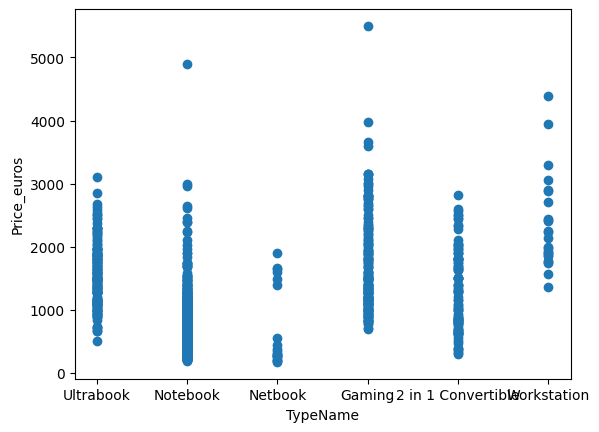

In [185]:
plt.plot(df['TypeName'], df['Price_euros'], 'o')
plt.xlabel('TypeName')
plt.ylabel('Price_euros')
plt.show()

In [186]:
df.drop(['TypeName'], inplace=True, axis=1)

### Company

In [187]:
df.head()

,Company,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid
0,Apple,13.3,8.0,1.34,898.94,1440.0,900.0,0,1.8,0.0,1.0,0.0,0.0,128.0,0.0
1,Apple,15.4,16.0,1.83,2537.45,2880.0,1800.0,0,2.7,0.0,1.0,0.0,512.0,0.0,0.0
2,Apple,13.3,8.0,1.37,1803.60,2560.0,1600.0,0,3.1,0.0,1.0,0.0,256.0,0.0,0.0
3,Acer,15.6,4.0,2.10,400.00,1366.0,768.0,0,3.0,3.0,0.0,500.0,0.0,0.0,0.0
4,Apple,15.4,16.0,2.04,2139.97,2880.0,1800.0,0,2.2,0.0,1.0,0.0,0.0,256.0,0.0


In [188]:
company_names = df['Company'].unique()

company_dic = {}

for i in range(len(company_names)):
    company_dic[company_names[i]] = i
    
company_dic

{'Apple': 0,
 'Acer': 1,
 'Asus': 2,
 'HP': 3,
 'Dell': 4,
 'Lenovo': 5,
 'MSI': 6,
 'Microsoft': 7,
 'Toshiba': 8,
 'Xiaomi': 9,
 'Vero': 10,
 'Chuwi': 11,
 'Mediacom': 12,
 'Samsung': 13,
 'Google': 14,
 'Fujitsu': 15,
 'Razer': 16,
 'LG': 17}

In [189]:
df['new_company'] = df['Company'].map(company_dic).fillna(18)

In [190]:
df

,Company,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid,new_company
0,Apple,13.3,8.0,1.34,898.94,1440.0,900.0,0,1.8,0.0,1.0,0.0,0.0,128.0,0.0,0
1,Apple,15.4,16.0,1.83,2537.45,2880.0,1800.0,0,2.7,0.0,1.0,0.0,512.0,0.0,0.0,0
2,Apple,13.3,8.0,1.37,1803.60,2560.0,1600.0,0,3.1,0.0,1.0,0.0,256.0,0.0,0.0,0
3,Acer,15.6,4.0,2.10,400.00,1366.0,768.0,0,3.0,3.0,0.0,500.0,0.0,0.0,0.0,1
4,Apple,15.4,16.0,2.04,2139.97,2880.0,1800.0,0,2.2,0.0,1.0,0.0,0.0,256.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Asus,15.6,4.0,2.20,720.32,1366.0,768.0,0,2.5,0.0,0.0,500.0,0.0,0.0,0.0,2
1104,Lenovo,14.0,4.0,1.80,638.00,1920.0,1080.0,1,2.5,0.0,0.0,0.0,128.0,0.0,0.0,5
1105,Lenovo,14.0,2.0,1.50,229.00,1366.0,768.0,0,1.6,0.0,0.0,0.0,0.0,64.0,0.0,5
1106,HP,15.6,6.0,2.19,764.00,1366.0,768.0,0,2.5,0.0,0.0,1000.0,0.0,0.0,0.0,3


In [191]:
df.drop(['Company'], axis=1, inplace=True)

In [192]:
df.head()

,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid,new_company
0,13.3,8.0,1.34,898.94,1440.0,900.0,0,1.8,0.0,1.0,0.0,0.0,128.0,0.0,0
1,15.4,16.0,1.83,2537.45,2880.0,1800.0,0,2.7,0.0,1.0,0.0,512.0,0.0,0.0,0
2,13.3,8.0,1.37,1803.60,2560.0,1600.0,0,3.1,0.0,1.0,0.0,256.0,0.0,0.0,0
3,15.6,4.0,2.10,400.00,1366.0,768.0,0,3.0,3.0,0.0,500.0,0.0,0.0,0.0,1
4,15.4,16.0,2.04,2139.97,2880.0,1800.0,0,2.2,0.0,1.0,0.0,0.0,256.0,0.0,0


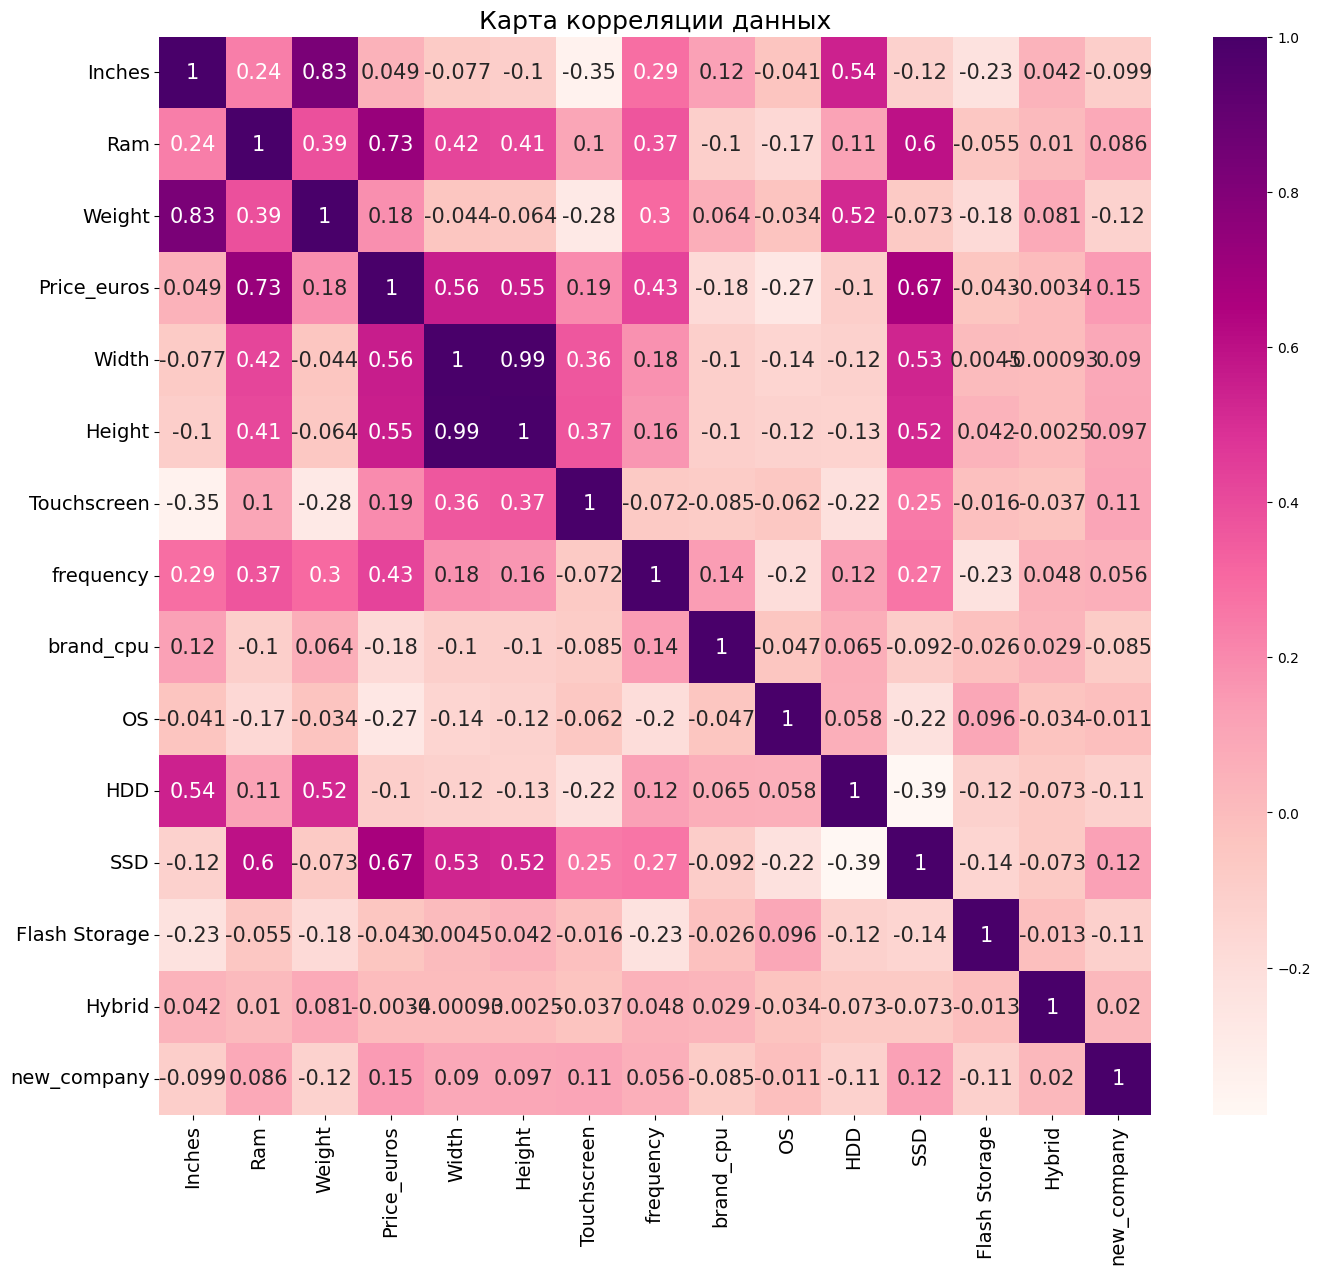

In [193]:
plt.figure(figsize=(16, 14))

dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 15})

plt.title("Карта корреляции данных", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Линейная регрессия 

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [195]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [196]:
X = df.drop(['Price_euros'], axis=1)
y = df['Price_euros']

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (941, 14), (941,)
Test dataset size: (167, 14), (167,)


In [198]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [199]:
y_pred = model.predict(X_test)

In [200]:
from sklearn import metrics 

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 271.24677629776204
MSE 167346.64341286258
R2 Score: 0.6732292604997616


## Кроссвалидация

In [201]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [202]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')
scores

array([0.65157007, 0.70496841, 0.76399267, 0.77196373, 0.68870179,
       0.73804574, 0.63040132, 0.60415538, 0.67500285, 0.65295461])

In [203]:
mean_score = np.mean(scores)
mean_score

0.6881756562967153

## Test data

In [204]:
df = pd.read_csv('Price_euros_test.csv')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg
...,...,...,...,...,...,...,...,...,...,...,...,...
190,876,HP,Probook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.07kg
191,282,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg
192,528,HP,Spectre X360,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
193,1204,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg


### Подготовим тестувую выборку

In [205]:
df['ScreenResolution'] = ['1920x1080' if type(i) == float else i for i in df['ScreenResolution'] ]
df['ScreenResolution'].isnull().sum()

0

In [206]:
df['OpSys'] = ['Windows 10' if type(i) == float else i for i in df['OpSys']]
df['OpSys'].value_counts()

Windows 10      168
Windows 7         8
Linux             7
No OS             5
Chrome OS         2
Windows 10 S      2
macOS             2
Mac OS X          1
Name: OpSys, dtype: int64

In [207]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Weight'] = [df['Weight'].mean() if np.isnan(i) else i for i in df['Weight']]

In [208]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(float)

In [209]:
df['WidthAndHeight'] = [i.split()[-1] if type(i) != float else np.nan for i in df['ScreenResolution']]

df['Width'] = [i.split('x')[0] if type(i) != float else np.nan for i in df['WidthAndHeight']]
df['Height'] = [i.split('x')[-1] if type(i) != float else np.nan for i in df['WidthAndHeight']]

df['Touchscreen'] = [1 if (type(i) != float) and ('Touchscreen' in i) else 0 for i in df['ScreenResolution']]

df['Width'] = df['Width'].astype(float)
df['Height'] = df['Height'].astype(float)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,WidthAndHeight,Width,Height,Touchscreen
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,1TB HDD,AMD Radeon R5,Windows 10,2.10,1366x768,1366.0,768.0,0
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,1920x1080,1920.0,1080.0,0
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,1920x1080,1920.0,1080.0,0
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,1920x1080,1920.0,1080.0,0
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12.0,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,1366x768,1366.0,768.0,0


In [210]:
df.drop(['ScreenResolution'], axis=1, inplace=True)
df.drop(['WidthAndHeight'], axis=1, inplace=True)
df.drop(['laptop_ID'], axis=1, inplace=True)
df.drop(['Gpu'], axis=1, inplace=True)
df.drop(['Product'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Width,Height,Touchscreen
0,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4.0,1TB HDD,Windows 10,2.10,1366.0,768.0,0
1,Razer,Gaming,14.0,Intel Core i7 7700HQ 2.8GHz,16.0,1TB SSD,Windows 10,1.95,1920.0,1080.0,0
2,Asus,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Windows 10,1.70,1920.0,1080.0,0
3,Asus,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Windows 10,2.99,1920.0,1080.0,0
4,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,12.0,1TB HDD,Windows 10,2.25,1366.0,768.0,0


In [211]:
df['frequency'] =  [x.split(' ')[-1].replace('GHz', '') for x in df['Cpu']]
df['frequency'] = df['frequency'].astype(float)

df['brand_cpu'] =  [x.split(' ')[0] for x in df['Cpu']]

df.drop(['Cpu'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Width,Height,Touchscreen,frequency,brand_cpu
0,Acer,Notebook,15.6,4.0,1TB HDD,Windows 10,2.10,1366.0,768.0,0,3.0,AMD
1,Razer,Gaming,14.0,16.0,1TB SSD,Windows 10,1.95,1920.0,1080.0,0,2.8,Intel
2,Asus,Notebook,15.6,8.0,256GB SSD,Windows 10,1.70,1920.0,1080.0,0,1.8,Intel
3,Asus,Gaming,17.3,16.0,256GB SSD + 1TB HDD,Windows 10,2.99,1920.0,1080.0,0,2.8,Intel
4,Dell,Notebook,15.6,12.0,1TB HDD,Windows 10,2.25,1366.0,768.0,0,2.5,Intel


In [212]:
df['OS'] = df['OpSys']

df.loc[df['OS'].str.contains('Windows'), 'OS'] = '0'
df.loc[df['OS'].str.contains('macOS|Mac OS X'), 'OS'] = '1'
df.loc[df['OS'].str.contains('Linux'), 'OS'] = '2'
df.loc[~df['OS'].isin(['0', '1', '2']), 'OS'] = 3

df.drop(['OpSys'], axis=1, inplace=True)

df['OS'].value_counts()

0    178
3      7
2      7
1      3
Name: OS, dtype: int64

In [213]:
HDD = []
SSD = []
Flash_Storage = []
Hybrid = []

for i in df['Memory']:
    memory_types_size = separation_components(i)
    HDD.append(memory_types_size['HDD'])
    SSD.append(memory_types_size['SSD'])
    Flash_Storage.append(memory_types_size['Flash Storage'])
    Hybrid.append(memory_types_size['Hybrid'])

df['HDD'] = HDD
df['SSD'] = SSD
df['Flash Storage'] = Flash_Storage
df['Hybrid'] = Hybrid
df.drop(['Memory'], axis=1, inplace=True)

In [214]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid
0,Acer,Notebook,15.6,4.0,2.10,1366.0,768.0,0,3.0,AMD,0,1000.0,0,0,0.0
1,Razer,Gaming,14.0,16.0,1.95,1920.0,1080.0,0,2.8,Intel,0,0,1000.0,0,0.0
2,Asus,Notebook,15.6,8.0,1.70,1920.0,1080.0,0,1.8,Intel,0,0,256,0,0.0
3,Asus,Gaming,17.3,16.0,2.99,1920.0,1080.0,0,2.8,Intel,0,1000.0,256,0,0.0
4,Dell,Notebook,15.6,12.0,2.25,1366.0,768.0,0,2.5,Intel,0,1000.0,0,0,0.0


In [215]:
df['OS'] = df['OS'].astype(float)
df['Flash Storage'] = df['Flash Storage'].astype(float)
df['Hybrid'] = df['Hybrid'].astype(float)
df['SSD'] = df['SSD'].astype(float)
df['HDD'] = df['HDD'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        195 non-null    object 
 1   TypeName       195 non-null    object 
 2   Inches         195 non-null    float64
 3   Ram            195 non-null    float64
 4   Weight         195 non-null    float64
 5   Width          195 non-null    float64
 6   Height         195 non-null    float64
 7   Touchscreen    195 non-null    int64  
 8   frequency      195 non-null    float64
 9   brand_cpu      195 non-null    object 
 10  OS             195 non-null    float64
 11  HDD            195 non-null    float64
 12  SSD            195 non-null    float64
 13  Flash Storage  195 non-null    float64
 14  Hybrid         195 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 23.0+ KB


In [216]:
replace_dict = {'Intel': 0, 'Amd': 1, 'Samsung': 2}
df['brand_cpu'] = df['brand_cpu'].map(replace_dict).fillna(3)

In [217]:
df.drop(['TypeName'], inplace=True, axis=1)

In [218]:
company_names = df['Company'].unique()

company_dic = {}

for i in range(len(company_names)):
    company_dic[company_names[i]] = i
    
company_dic

{'Acer': 0,
 'Razer': 1,
 'Asus': 2,
 'Dell': 3,
 'Lenovo': 4,
 'Huawei': 5,
 'Mediacom': 6,
 'HP': 7,
 'MSI': 8,
 'Toshiba': 9,
 'Apple': 10,
 'LG': 11,
 'Microsoft': 12,
 'Chuwi': 13}

In [219]:
df['new_company'] = df['Company'].map(company_dic).fillna(18)

In [220]:
df.drop(['Company'], axis=1, inplace=True)

In [221]:
df.head()

,Inches,Ram,Weight,Width,Height,Touchscreen,frequency,brand_cpu,OS,HDD,SSD,Flash Storage,Hybrid,new_company
0,15.6,4.0,2.10,1366.0,768.0,0,3.0,3.0,0.0,1000.0,0.0,0.0,0.0,0
1,14.0,16.0,1.95,1920.0,1080.0,0,2.8,0.0,0.0,0.0,1000.0,0.0,0.0,1
2,15.6,8.0,1.70,1920.0,1080.0,0,1.8,0.0,0.0,0.0,256.0,0.0,0.0,2
3,17.3,16.0,2.99,1920.0,1080.0,0,2.8,0.0,0.0,1000.0,256.0,0.0,0.0,2
4,15.6,12.0,2.25,1366.0,768.0,0,2.5,0.0,0.0,1000.0,0.0,0.0,0.0,3


Test

In [222]:
X_test = df
y_pred = model.predict(X_test)
y_pred

array([ 339.56928142, 2459.26375765,  968.15262308, 1696.51592395,
       1036.54716686, 1440.37678114, 1581.80452393,  473.58826834,
       1065.26744221,  507.75280004, 1312.51059927, 1213.70689549,
       1143.47944503,  700.11138912,  991.03352576, 2504.99890621,
       1306.35715239,  293.96185571, 1217.34626527,  570.17084264,
        944.47067618,  995.99221224,  500.75415101, 1200.07388899,
       1645.70103008, 1780.96613201,  905.69859946,  513.66419981,
        537.48200012, 3026.5632457 ,  558.57122632, 1645.17656162,
        371.61222134, 2095.15186472,  888.1635818 , 1525.92518495,
       1301.02577452,  380.64112267, 1940.94521551,  761.46306954,
       1794.11762224,  296.33606169,  307.91707054, 1200.95824458,
       1154.41175534, 1421.8906003 , 1296.52588212, 2203.32423991,
       1111.78179027, 1296.48825762, 1224.17979914,  952.44339526,
       1465.48872061, 1659.0107386 ,  644.18913719,  986.76183847,
       1532.91521136,  969.45615124,  800.90649602, 1301.35690

In [223]:
answer = pd.DataFrame()

answer['Price_euros'] = y_pred

answer

,Price_euros
0,339.569281
1,2459.263758
2,968.152623
3,1696.515924
4,1036.547167
...,...
190,758.287561
191,737.516935
192,1355.438765
193,1961.438819


In [224]:
answer.to_csv('result.csv')

In [225]:
test = pd.read_csv('result.csv')
test

,Unnamed: 0,Price_euros
0,0,339.569281
1,1,2459.263758
2,2,968.152623
3,3,1696.515924
4,4,1036.547167
...,...,...
190,190,758.287561
191,191,737.516935
192,192,1355.438765
193,193,1961.438819
